### Student Information
Name:呂紹銘

Student ID:FCU D1133324

GitHub ID:pooh0424

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1. 下載所需套件


In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import math
import PAMI
import umap
%matplotlib inline
import matplotlib


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2.載入資料


In [2]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
print(f"數據集形狀: {df.shape}")
print(f"列名: {df.columns.tolist()}")
print(df[0:5][["text","label"]])

數據集形狀: (847, 16)
列名: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
                                                text  label
0                                   Calls on retards   -1.0
1  Stunt as in like why did they even make a big ...    0.0
2                  Seeing lots of red in the ticker.    0.0
3  Vision Marine Technologies Inc. is rewriting t...    1.0
4                           He didn’t say thank you.   -1.0


### 3.處理資料

In [3]:
# 簡化數據集，只保留必要的列
X = df[['text', 'label']].copy()
X['category_name'] = X['label'].map({1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'})

print(f"清理後數據形狀: {X.shape}")
print(X[0:5][["text","label","category_name"]])

清理後數據形狀: (847, 3)
                                                text  label category_name
0                                   Calls on retards   -1.0      negative
1  Stunt as in like why did they even make a big ...    0.0       neutral
2                  Seeing lots of red in the ticker.    0.0       neutral
3  Vision Marine Technologies Inc. is rewriting t...    1.0      positive
4                           He didn’t say thank you.   -1.0      negative


In [4]:
#  檢查缺失值
def check_missing_values(series):
    missing_count = series.sum()
    return f"找到 {missing_count} 個缺失值"

print("檢查缺失值:")
missing_summary = X.isnull().apply(lambda x: check_missing_values(x))
print(missing_summary)

# 創建綜合缺失值檢查函數
def comprehensive_missing_check(series):
    return (series.isnull() | 
            (series == '') | 
            (series == 'NaN') | 
            (series == 'None') |
            (series == 'null'))

# 檢查各種類型的缺失值
comprehensive_missing = comprehensive_missing_check(X['text'])
print(f"綜合缺失值檢查發現: {comprehensive_missing.sum()} 個缺失值")

檢查缺失值:
text             找到 0 個缺失值
label            找到 0 個缺失值
category_name    找到 0 個缺失值
dtype: object
綜合缺失值檢查發現: 0 個缺失值


In [5]:
# 檢查重複數據

print(f"重複記錄數: {X.duplicated().sum()}")
# 移除重複數據
original_length = len(X)
X = X.drop_duplicates(subset=['text'], keep='first')
print(f"移除重複後，從 {original_length} 條記錄減少到 {len(X)} 條記錄")

重複記錄數: 23
移除重複後，從 847 條記錄減少到 824 條記錄


In [6]:
# 抽樣

X_sample = X.sample(500, random_state=42)
print(f"樣本數據集大小: {len(X_sample)}")

樣本數據集大小: 500


### 4.類別觀察

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

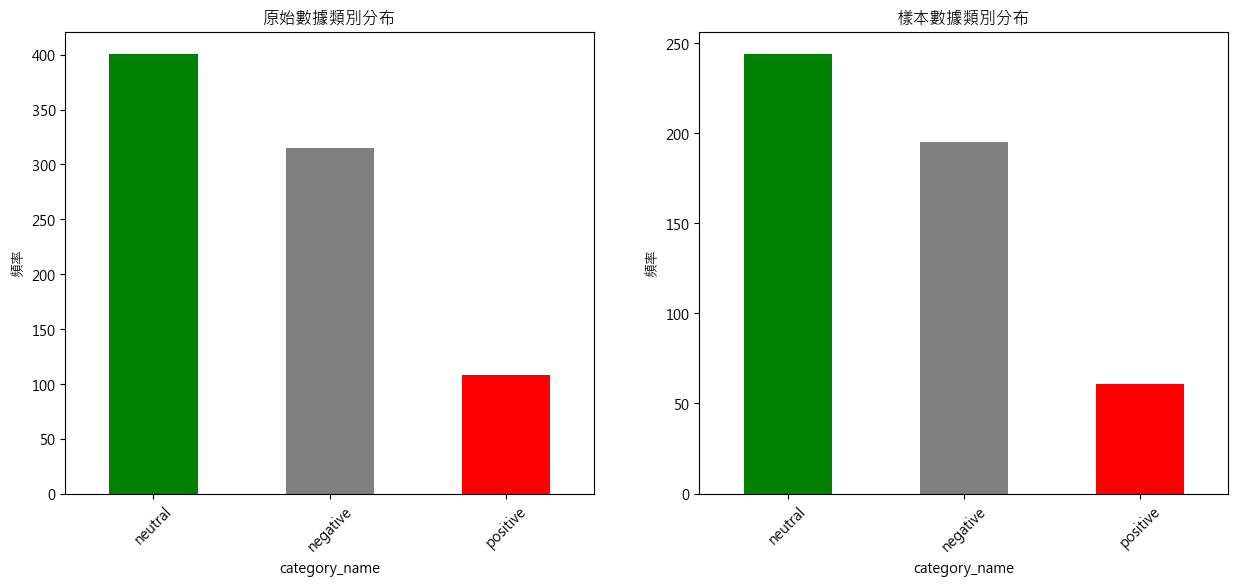

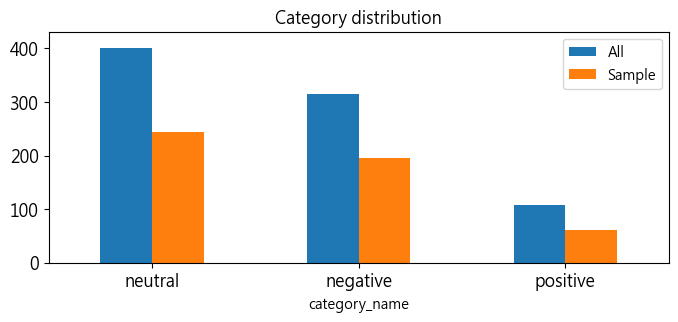

In [7]:
matplotlib.rc('font', family='Microsoft JhengHei')
# 繪製類別分布圖
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 原始數據分布
X['category_name'].value_counts().plot(kind='bar', ax=axes[0], 
                                      title='原始數據類別分布',
                                      color=['green', 'gray', 'red'])
axes[0].set_ylabel('頻率')
axes[0].tick_params(axis='x', rotation=45)

# 樣本數據分布
X_sample['category_name'].value_counts().plot(kind='bar', ax=axes[1], 
                                            title='樣本數據類別分布',
                                            color=['green', 'gray', 'red'])
axes[1].set_ylabel('頻率')
axes[1].tick_params(axis='x', rotation=45)
df_compare = pd.DataFrame({
    "All": X.category_name.value_counts(),
    "Sample": X_sample.category_name.value_counts()
})  # 如果有缺的類別補 0

# 繪製並列長條圖
df_compare.plot(kind = 'bar',title = 'Category distribution',ylim = [0, X.category_name.value_counts().max()+30],rot = 0, fontsize = 12, figsize = (8,3))


### 5.文字處理

In [8]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])

print(f"文檔-詞項矩陣形狀: {X_counts.shape}")
print(f"詞彙表大小: {len(count_vect.get_feature_names_out())}")
count_vect.get_feature_names_out()[120]

# 計算詞頻
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
feature_names = count_vect.get_feature_names_out()

# 按頻率排序詞彙
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = feature_names[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]

print(f"最高頻詞彙前10個: {sorted_terms[:10]}")
print(f"對應頻率: {sorted_frequencies[:10]}")

文檔-詞項矩陣形狀: (824, 4346)
詞彙表大小: 4346
最高頻詞彙前10個: ['the' 'to' 'and' 'is' 'it' 'of' 'in' 'that' 'for' 'this']
對應頻率: [886 557 475 390 341 302 280 225 211 210]


### 6.term-document matrix

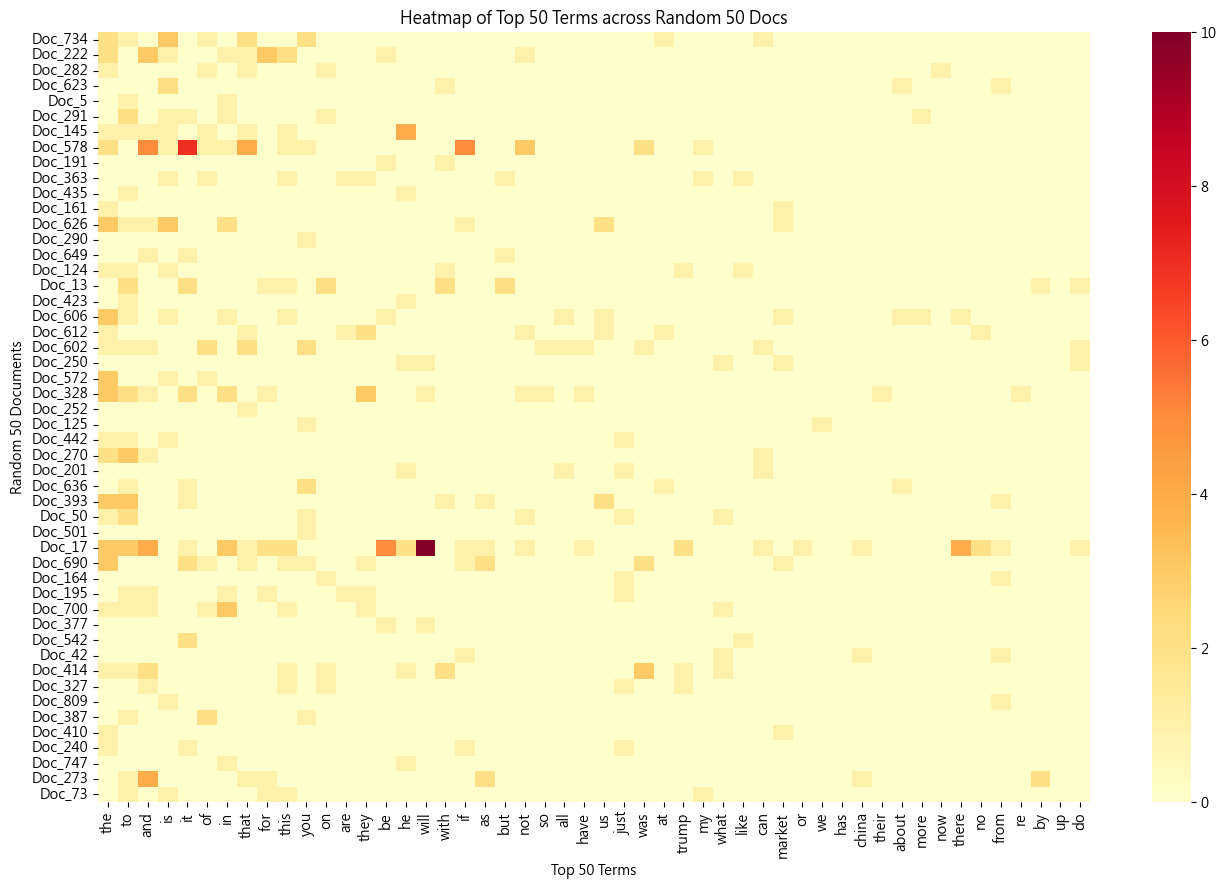

In [9]:
# Assume X_counts is a scipy sparse matrix
n_docs, n_terms = 50, 50

# Compute total frequency of each term
term_totals = np.asarray(X_counts.sum(axis=0)).ravel()

# Select terms with frequency > 0
valid_terms = np.where(term_totals > 0)[0]

# Get the top n_terms most frequent terms
top_terms = np.argsort(term_totals[valid_terms])[::-1]   # sort in descending order
chosen_terms = valid_terms[top_terms[:n_terms]]          # select top n_terms

# Select documents that contain at least one of the chosen terms
valid_docs = np.where(X_counts[:, chosen_terms].sum(axis=1).A1 > 0)[0]
chosen_docs = np.random.choice(valid_docs, min(n_docs, len(valid_docs)), replace=False)

# Build submatrix with chosen docs and terms
submatrix = X_counts[np.ix_(chosen_docs, chosen_terms)].toarray()

# Visualization (ensures no all-zero rows or columns)
plt.figure(figsize=(16, 10))
sns.heatmap(
    submatrix,
    xticklabels=[count_vect.get_feature_names_out()[i] for i in chosen_terms],
    yticklabels=[f"Doc_{i}" for i in chosen_docs],
    cmap="YlOrRd"
)
plt.xlabel("Top 50 Terms")
plt.ylabel("Random 50 Documents")
plt.title("Heatmap of Top 50 Terms across Random 50 Docs")
plt.show()

### 7.詞頻分布

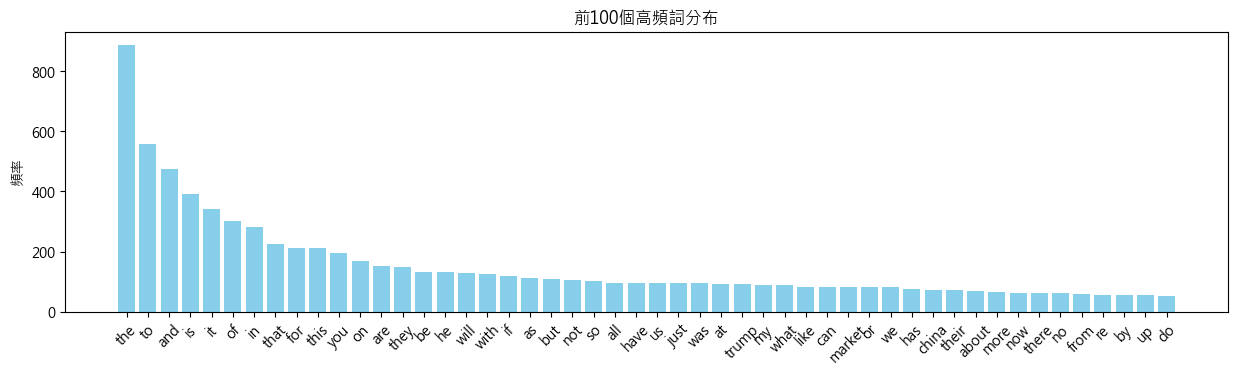

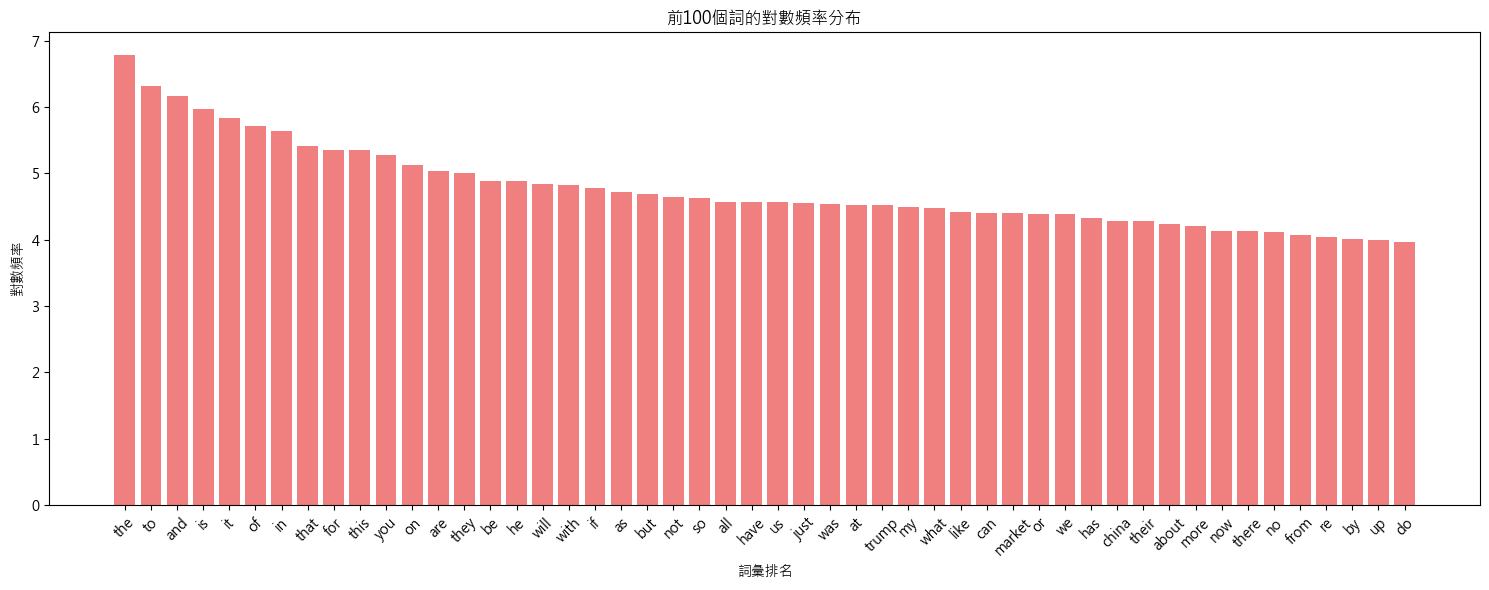

In [10]:
# 繪製詞頻分布
plt.figure(figsize=(15, 8))

# 前100個高頻詞
plt.subplot(2, 1, 1)
plt.bar(range(50), sorted_frequencies[:50], color='skyblue')
plt.title('前100個高頻詞分布')
plt.ylabel('頻率')
plt.xticks(range(0, 50), sorted_terms[:50], rotation=45)


# 對數頻率分布
log_frequencies = [math.log(f) for f in sorted_frequencies]  

plt.figure(figsize=(15, 6))
plt.bar(range(50), log_frequencies[:50], color='lightcoral')
plt.title('前100個詞的對數頻率分布')
plt.xlabel('詞彙排名')
plt.ylabel('對數頻率')
plt.xticks(range(0, 50), sorted_terms[:50], rotation=45)
plt.tight_layout()
plt.show()

### 8.其他視覺化方法

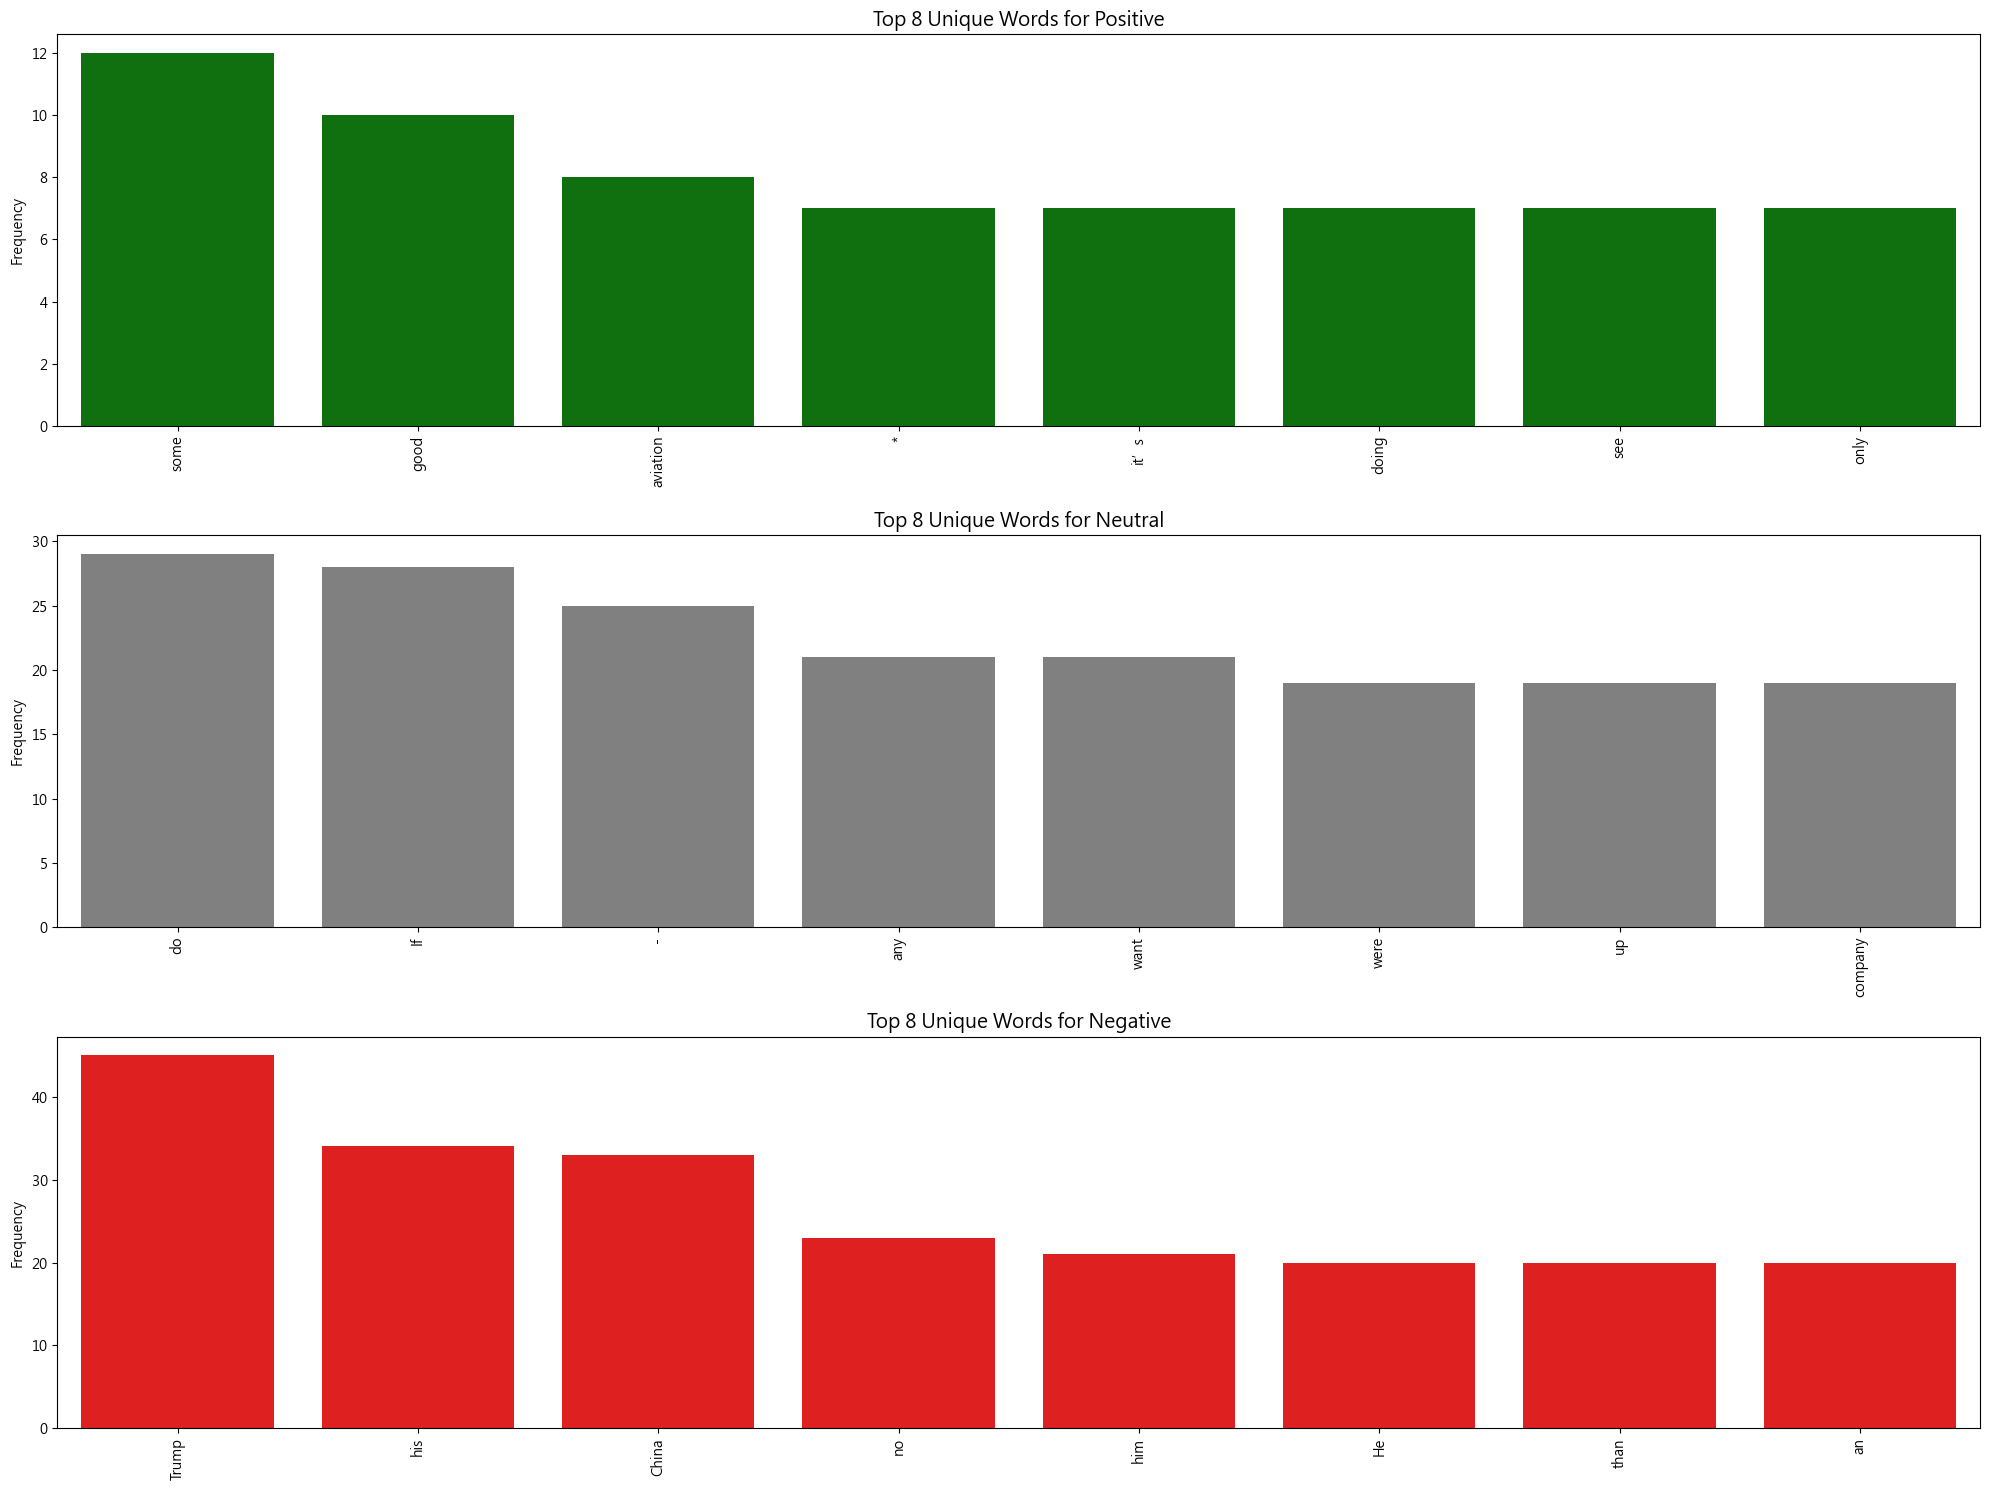

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

top_n = 60          # 原始取前60高頻詞
top_unique_n = 8   # 每個類別顯示前8個獨有詞
labels = ['positive', 'neutral', 'negative']
colors = ['green', 'gray', 'red']

plt.figure(figsize=(20, 15))

# 計算每個情感的詞頻與Top-N
label_word_counts = {}
label_top_words = {}

for label in labels:
    texts = X[X['category_name'] == label]['text'].astype(str)
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    label_word_counts[label] = word_counts
    top_words = set([w for w, f in word_counts.most_common(top_n)])
    label_top_words[label] = top_words

# 找出每個情感的獨有詞
unique_words = {}
for label in labels:
    other_labels = set(labels) - {label}
    other_words = set()
    for ol in other_labels:
        other_words.update(label_top_words[ol])
    # 取獨有詞
    unique_words[label] = label_top_words[label] - other_words

# 繪製條形圖
for idx, label in enumerate(labels):
    # 取獨有詞及其頻率
    words_freqs = [(w, label_word_counts[label][w]) for w in unique_words[label]]
    # 依頻率排序，由高到低
    words_freqs_sorted = sorted(words_freqs, key=lambda x: x[1], reverse=True)
    # 只取前 top_unique_n 個
    words_freqs_top = words_freqs_sorted[:top_unique_n]
    
    words, freqs = zip(*words_freqs_top)
    
    plt.subplot(len(labels), 1, idx+1)
    sns.barplot(x=list(words), y=list(freqs), color=colors[idx])
    plt.title(f'Top {top_unique_n} Unique Words for {label.capitalize()}', fontsize=14)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# Phase 2

In [12]:
### Begin Assignment Here